# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

**Sumber Dataset**:  
Project ini akan menggunakan dataset berjudul "Bank Transaction Dataset for Fraud Detection"
Dataset ini bersumber dari platform [kaggle](https://www.kaggle.com/datasets/valakhorasani/bank-transaction-dataset-for-fraud-detection/)

**Overview Dataset**:
Dataset ini berisi 2,512 sampel data transaksi keuangan, yang mencakup berbagai atribut transaksi, demografi pelanggan, dan pola penggunaan. Dataset ini dirancang untuk analisis pola transaksi, deteksi penipuan, dan pembuatan model prediksi untuk aplikasi keamanan keuangan.

Tujuan dilakukan clustering pada dataset ini adalah untuk menemukan pola transaksi yang terindikasi fraud. Dengan fitur yang ada, baik numerikal dan kategorikal, akan dilakukan preprocessing hingga siap untuk dilakukan pelatihan model clustering. Hasil akhir yang diharapkan adalah model dapat mengenali pola transaksi yang dianggap tidak wajar yang mengarah pada risiko terjadinya fraud dan tidak fraud.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from sklearn.decomposition import PCA

In [2]:
pip install scikit-optimize

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 1.8 MB/s eta 0:00:00


In [3]:
from skopt import BayesSearchCV
from skopt.space import Integer, Categorical

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Dataset yang dipakai pada project ini telah saya publikasi melalui github dan kita akan memuatnya menggunakan pandas dari tautan raw csv github.

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/syafiqirz/Bank-Fraud-Transaction-Clustering-Classification/refs/heads/main/bank_transaction_data.csv')
df.head(5)

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

## 1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

In [5]:
df

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2507,TX002508,AC00297,856.21,2023-04-26 17:09:36,Credit,Colorado Springs,D000625,21.157.41.17,M072,Branch,33,Doctor,109,1,12690.79,2024-11-04 08:11:29
2508,TX002509,AC00322,251.54,2023-03-22 17:36:48,Debit,Tucson,D000410,49.174.157.140,M029,Branch,48,Doctor,177,1,254.75,2024-11-04 08:11:42
2509,TX002510,AC00095,28.63,2023-08-21 17:08:50,Debit,San Diego,D000095,58.1.27.124,M087,Branch,56,Retired,146,1,3382.91,2024-11-04 08:08:39
2510,TX002511,AC00118,185.97,2023-02-24 16:24:46,Debit,Denver,D000634,21.190.11.223,M041,Online,23,Student,19,1,1776.91,2024-11-04 08:12:22


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14  AccountBalance          

**Struktur Dataset**:  
- Total entri: 2.512
- Kolom: 16 (5 numerik, 11 kategorikal)  
- Tidak ada missing value.  

## 2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*).
   Setelah dicek, dataset ini tidak memiliki nilai yang hilang ataupun duplikat sehingga sudah dapat dilanjutkan ke tahap selanjutnya.

In [7]:
df.isna().sum()

,0
TransactionID,0
AccountID,0
TransactionAmount,0
TransactionDate,0
TransactionType,0
Location,0
DeviceID,0
IP Address,0
MerchantID,0
Channel,0


In [8]:
df.duplicated().sum()

np.int64(0)

## 3. **Analisis Distribusi dan Korelasi**  

### Analisis distribusi variabel numerik dengan statistik deskriptif

In [9]:
df.describe(include='all')

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
count,2512,2512,2512.000000,2512,2512,2512,2512,2512,2512,2512,2512.000000,2512,2512.000000,2512.000000,2512.000000,2512
unique,2512,495,NaN,2512,2,43,681,592,100,3,NaN,4,NaN,NaN,NaN,360
top,TX002496,AC00460,NaN,2023-04-03 16:07:53,Debit,Fort Worth,D000548,200.136.146.93,M026,Branch,NaN,Student,NaN,NaN,NaN,2024-11-04 08:09:17
freq,1,12,NaN,1,1944,70,9,13,45,868,NaN,657,NaN,NaN,NaN,16
mean,NaN,NaN,297.593778,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.673965,NaN,119.643312,1.124602,5114.302966,NaN
std,NaN,NaN,291.946243,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.792198,NaN,69.963757,0.602662,3900.942499,NaN
min,NaN,NaN,0.260000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.000000,NaN,10.000000,1.000000,101.250000,NaN
25%,NaN,NaN,81.885000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.000000,NaN,63.000000,1.000000,1504.370000,NaN
50%,NaN,NaN,211.140000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.000000,NaN,112.500000,1.000000,4735.510000,NaN
75%,NaN,NaN,414.527500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.000000,NaN,161.000000,1.000000,7678.820000,NaN


**Insight:**

**Variabel Numerik**
- **TransactionAmount**:
  - Rata-rata transaksi €297.59 (std €291.95), dengan nilai minimum €0.26 dan maksimum €1,919.11.
  - 50% transaksi bernilai di bawah €211.14 (median).

- **CustomerAge**:
  - Rentang usia nasabah 18-80 tahun (median 45 tahun).
  - Distribusi cukup merata dengan standar deviasi ±17.79 tahun.

- **TransactionDuration**:
  - Durasi transaksi rata-rata 119.64 detik (±69.96 detik), dengan durasi terpanjang 300 detik (5 menit).

- **LoginAttempts**:
  - Mayoritas hanya 1 kali percobaan login (75% data), dengan maksimum 5 kali percobaan.

- **AccountBalance**:
  - Saldo akun bervariasi signifikan: rata-rata €5,114.30 (std €900.94), dari €101.25 hingga €14,977.99.
  - 50% nasabah memiliki saldo di bawah €4,735.51 (median).
  - Perbedaan signifikan antara nilai minimum dan maksimum saldo mengindikasikan variasi profil ekonomi nasabah.

**Variabel Kategorik**
- **TransactionType**:
  - Tipe transaksi paling umum adalah **Debit** (1,194 transaksi) dari 4 kategori unik.

- **Location**:
  - Transaksi terbanyak terjadi di **Fort Worth** (4,709 transaksi) dari 24 lokasi unik.

- **MerchantID**:
  - Terdapat 1,003 merchant unik, dengan merchant **M026** paling dominan (1,345 transaksi).

- **Channel**:
  - Mayoritas transaksi dilakukan melalui **Branch** (657 transaksi) dari 3 saluran.

- **CustomerOccupation**:
  - Pekerjaan nasabah didominasi **Student** (657 nasabah) dari 5 kategori pekerjaan.

- **DeviceID** dan **IP Address**:
  - Memiliki kardinalitas tinggi (4,368 device dan 1,592 alamat IP unik), menunjukkan diversitas perangkat dan jaringan.

### Visualisasi boxplot variabel numerik

In [10]:
numeric_cols = ['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'LoginAttempts', 'AccountBalance']
categorical_cols = ['TransactionType', 'Location', 'MerchantID', 'Channel', 'CustomerOccupation', 'DeviceID', 'IP Address']

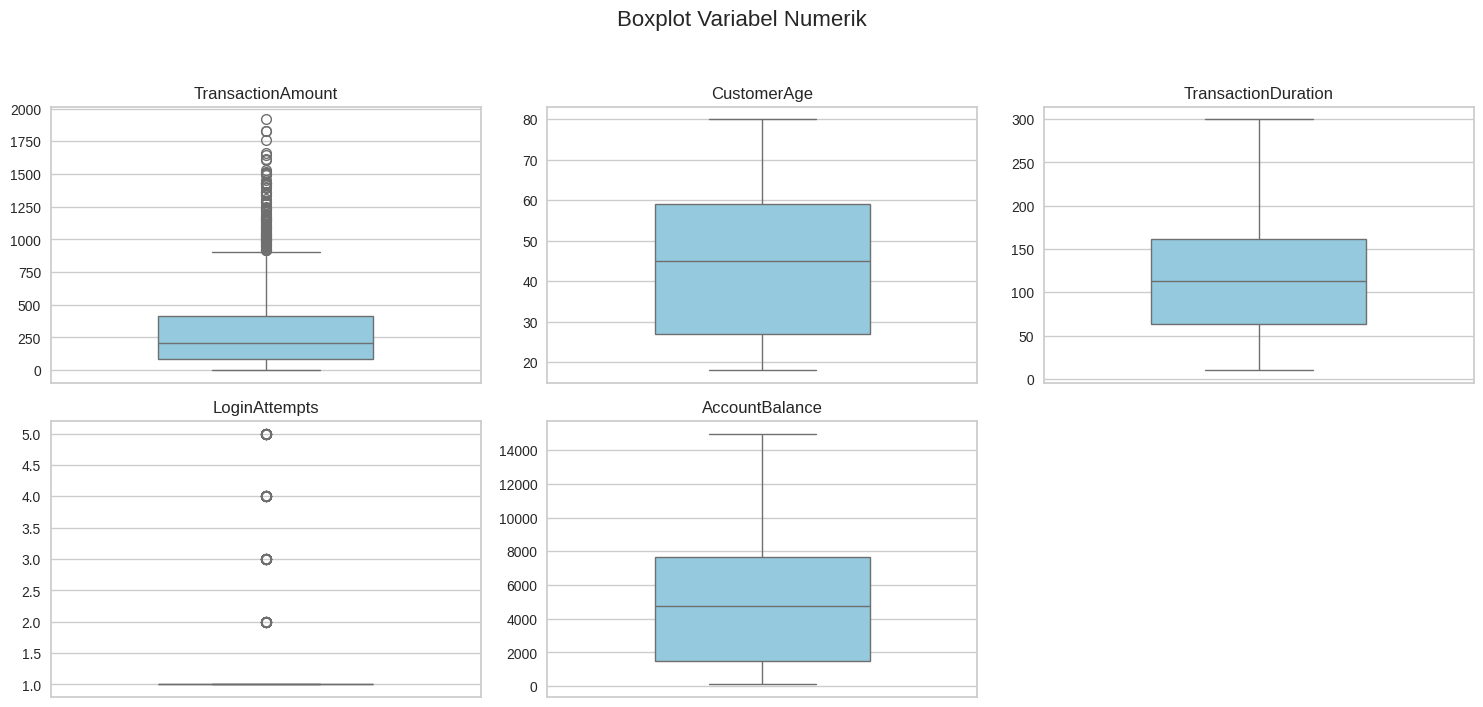

In [11]:
plt.figure(figsize=(15, 10))
plt.suptitle('Boxplot Variabel Numerik', y=1.02, fontsize=16)

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 3, i)  # 3 baris, 3 kolom, posisi ke-i
    sns.boxplot(data=df, y=col, color='skyblue', width=0.5)
    plt.title(col)
    plt.ylabel('')

plt.tight_layout()
plt.show()

**Insight Boxplot Variabel Numerik**

**1. TransactionAmount:** Terdapat **banyak outlier ekstrem di atas 1000**, bahkan mendekati 2000. Mayoritas transaksi berada di bawah 500. Distribusi right-skewed menunjukkan sebagian kecil transaksi dengan jumlah sangat besar. Perlu dipertimbangkan apakah outlier ini penting untuk analisis (misal: untuk mengidentifikasi potensi fraud) atau perlu transformasi.


**2. CustomerAge:** Distribusi relatif seimbang dengan rentang usia nasabah dari 18 hingga 80 tahun. Median usia sekitar **45 tahun**, menunjukkan mayoritas nasabah berada pada usia produktif. **Hampir tidak ada outlier**, artinya distribusi usia cukup normal.

**3. TransactionDuration:** Sebagian besar durasi transaksi berkisar antara **50 hingga 180 detik**. Ada nilai-nilai ekstrem hingga **300 detik**, tapi tidak terlalu banyak outlier. Distribusi sedikit right-skewed, mungkin mencerminkan pengguna lambat atau jaringan bermasalah.

**4. LoginAttempts:** Mayoritas pengguna hanya melakukan 1 percobaan login. Terdapat beberapa outlier hingga 5 percobaan login, bisa mengindikasikan upaya login gagal atau percobaan akses tidak sah (sinyal potensi fraud).

**5. AccountBalance:** Saldo akun sangat bervariasi, dengan banyak nasabah memiliki saldo di bawah 8000. Ada **outlier ekstrem hingga lebih dari 14.000**. Distribusi right-skewed, menunjukkan beberapa nasabah memiliki saldo sangat besar dibanding lainnya. Penting untuk dianalisis lebih lanjut apakah nilai-nilai ekstrem ini signifikan secara bisnis atau perlu penyesuaian.


### Visualisasi countplot variabel kategorikal.  

<ipython-input-12-067e028ca0be>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=col, palette='viridis',
<ipython-input-12-067e028ca0be>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=col, palette='viridis',
<ipython-input-12-067e028ca0be>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=col, palette='viridis',
<ipython-input-12-067e028ca0be>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and s

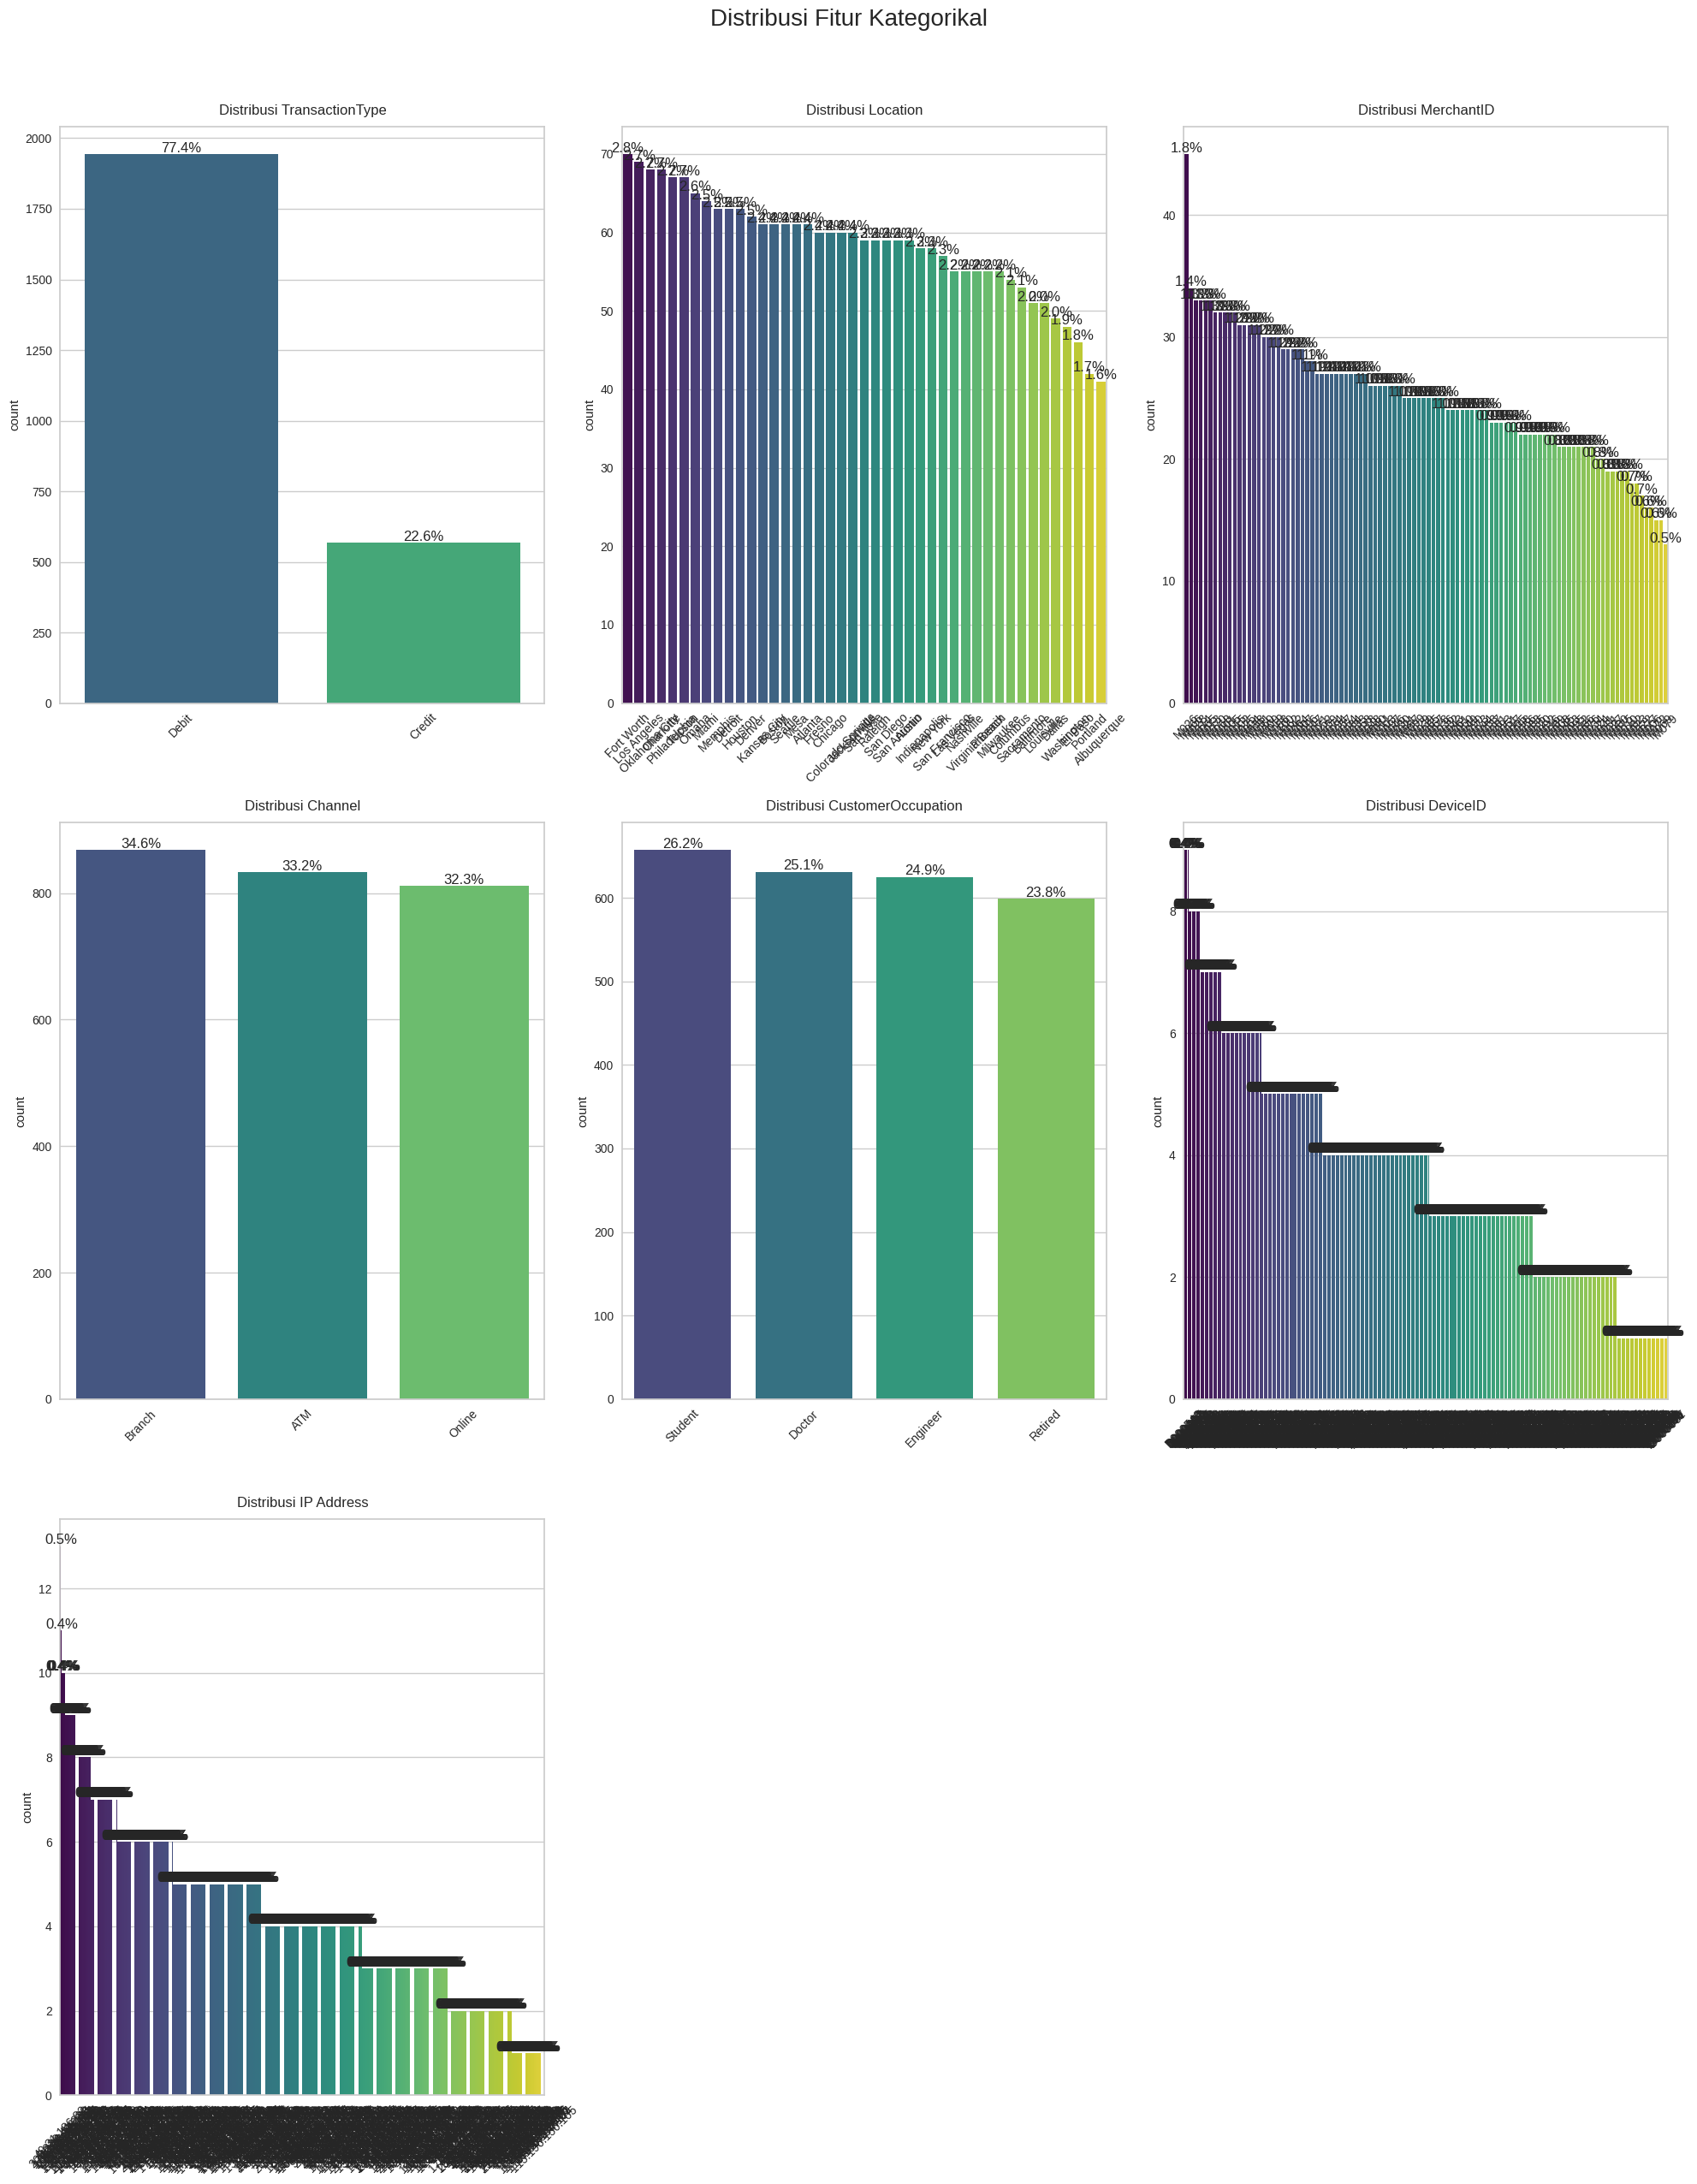

In [12]:
plt.figure(figsize=(20, 25))
plt.suptitle('Distribusi Fitur Kategorikal', y=1.02, fontsize=20)
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(3, 3, i)
    ax = sns.countplot(data=df, x=col, palette='viridis',
                      order=df[col].value_counts().index)

    total = len(df)
    for p in ax.patches:
        percentage = f'{100 * p.get_height()/total:.1f}%'
        ax.annotate(percentage,
                   (p.get_x() + p.get_width()/2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 5),
                   textcoords='offset points')

    plt.title(f'Distribusi {col}', pad=10)
    plt.xticks(rotation=45)
    plt.xlabel('')

plt.tight_layout()
plt.show()

**Insight Countplot Variabel Numerik**

**1. TransactionType:** Transaksi "Debit" mendominasi sebanyak 77.4%, jauh lebih tinggi dibandingkan "Credit" (22.6%). Hal ini menunjukkan mayoritas transaksi berupa pengeluaran/pembayaran, bukan pemasukan.


**2. Location:** Terdapat distribusi cukup merata pada banyak lokasi, namun kota teratas adalah kota-kota besar yang memiliki frekuensi transaksi paling tinggi. Kota-kota dengan transaksi rendah (misalnya kurang dari 20) bisa menjadi outlier geografis atau area dengan aktivitas transaksi rendah.

**3. MerchantID:** Hampir semua Merchant memiliki frekuensi rendah, dengan sebagian besar hanya 1–2 transaksi. Distribusi sangat long-tail, artinya ada sangat banyak merchant yang hanya muncul sekali, bisa jadi akun baru, dummy, atau indikasi fraud.

**4. Channel:** Tiga channel utama yaitu Branch (34.6%), ATM (33.2%), dan Online (32.3%) memiliki proporsi yang hampir seimbang. Menunjukkan penggunaan layanan channel yang diversifikasi oleh pelanggan.

**5. CustomerOccupation:** Distribusi hampir merata untuk keempat kategori:

- Student (26.2%)

- Doctor (25.1%)

- Engineer (24.9%)

- Retired (23.8%)

Tidak ada dominasi signifikan, yang bisa mencerminkan variasi profil pengguna dalam dataset.

**6. DeviceID:** Hampir seluruh DeviceID hanya digunakan beberapa kali saja. Seperti MerchantID, distribusinya menunjukkan banyak device unik, sebagian mungkin hanya digunakan 1–2 kali (indikasi pengguna baru atau potensi aktivitas mencurigakan).

**7. IP Address:** Sama seperti DeviceID dan MerchantID, sebagian besar IP Address hanya muncul 1–2 kali. Pola ini berpotensi mencerminkan banyaknya pengguna unik atau upaya penyamaran IP oleh pelaku fraud (IP rotasi dinamis).



## 4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

### Histogram

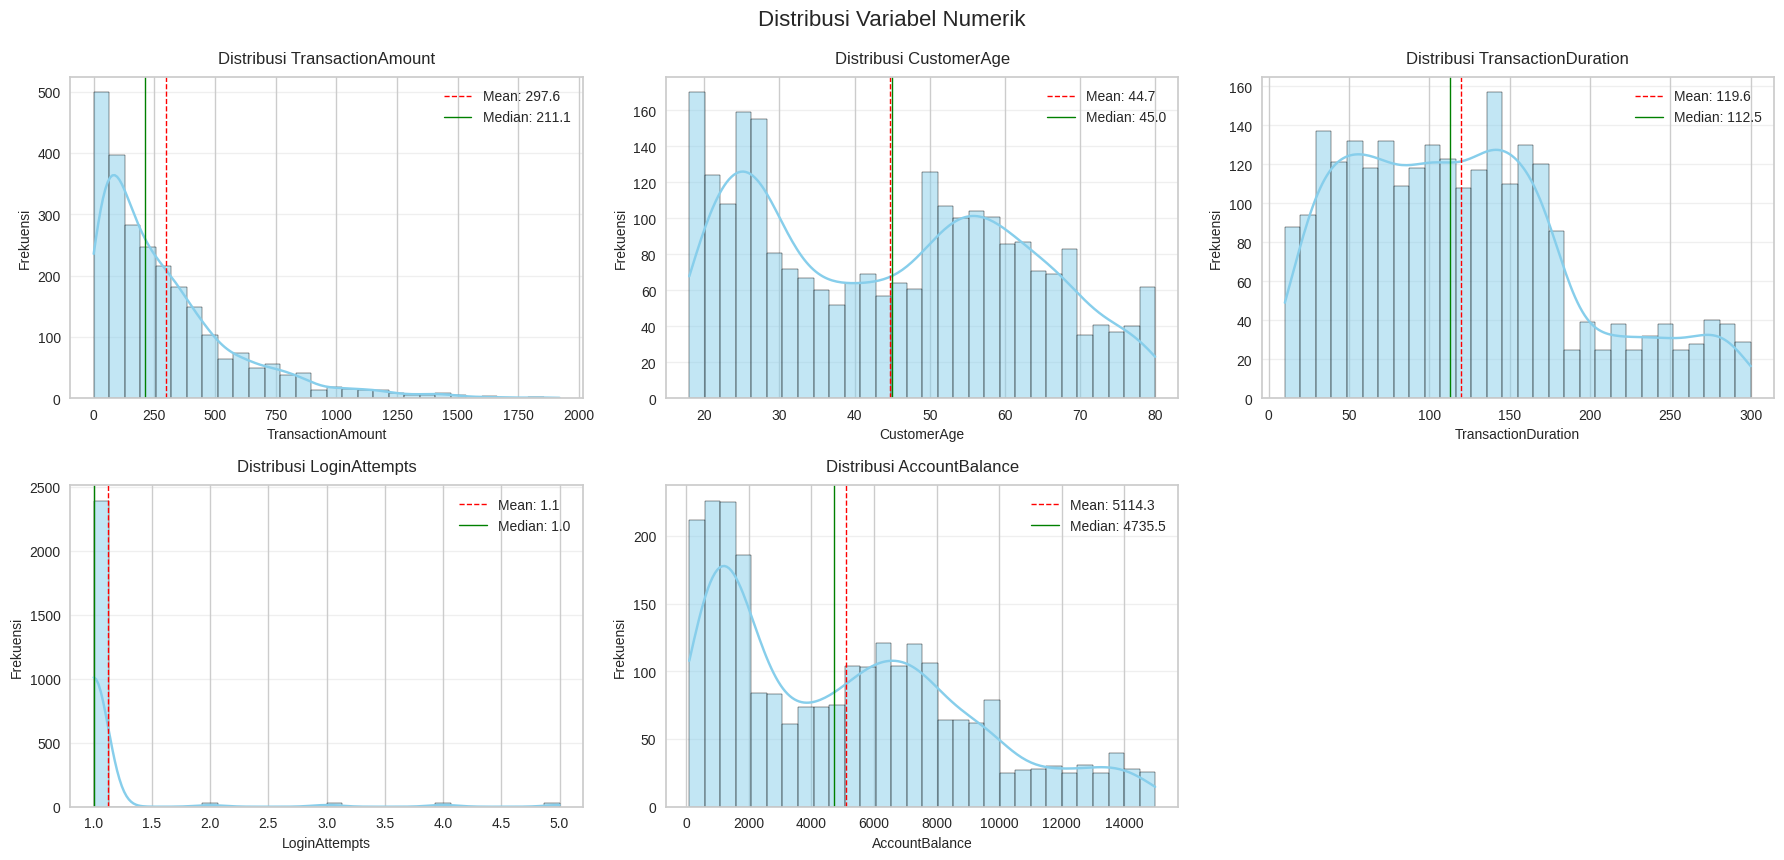

In [13]:
plt.figure(figsize=(18, 12))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data=df, x=col, kde=True, bins=30, color='skyblue')

    plt.title(f'Distribusi {col}', fontsize=12, pad=10)
    plt.xlabel(col, fontsize=10)
    plt.ylabel('Frekuensi', fontsize=10)
    plt.grid(axis='y', alpha=0.3)

    mean_val = df[col].mean()
    median_val = df[col].median()
    plt.axvline(mean_val, color='red', linestyle='--', linewidth=1, label=f'Mean: {mean_val:.1f}')
    plt.axvline(median_val, color='green', linestyle='-', linewidth=1, label=f'Median: {median_val:.1f}')
    plt.legend()

plt.tight_layout()
plt.suptitle('Distribusi Variabel Numerik', y=1.02, fontsize=16)
plt.show()

**Insight Histogram Variabel Numerik**

**1. TransactionAmount:**
- Rata-rata (mean): 297.6
- Median: 211.1
- Distribusi: Positif skew (condong ke kanan)
- Interpretasi: Sebagian besar nilai transaksi berada di bawah 300, namun terdapat beberapa nilai yang sangat tinggi (outlier) sehingga menaikkan rata-rata. Ini umum terjadi pada data finansial, di mana beberapa transaksi bernilai sangat besar.


**2. CustomerAge:**
- Rata-rata (mean): 44.7
- Median: 45.0
- Distribusi: Hampir simetris
- Interpretasi: Umur pelanggan terdistribusi cukup merata dengan puncak-puncak frekuensi di kelompok umur 20-an dan 50-an. Tidak ada skew yang signifikan, menunjukkan distribusi usia yang cukup seimbang dalam data.

**3. TransactionDuration:**
- Rata-rata (mean): 119.6 detik
- Median: 112.5 detik
- Distribusi: Sedikit positif skew
- Interpretasi: Sebagian besar transaksi selesai di bawah 150 detik. Rata-rata dan median cukup dekat, menunjukkan durasi transaksi relatif stabil, meskipun terdapat beberapa transaksi berdurasi sangat panjang.

**4. LoginAttempts:**
- Rata-rata (mean): 1.1
- Median: 1.0
- Distribusi: Sangat positif skew (ekstrem kanan)
- Interpretasi: Hampir semua pengguna hanya melakukan 1 kali percobaan login. Kasus login lebih dari 2 kali sangat jarang, kemungkinan merupakan indikasi percobaan login gagal atau mencurigakan.

**5. AccountBalance:**
- Rata-rata (mean): 5114.3
- Median: 4735.5
- Distribusi: Positif skew
- Interpretasi: Sebagian besar saldo rekening pelanggan berada di bawah 6000, namun terdapat beberapa akun dengan saldo sangat tinggi, yang menyebabkan nilai rata-rata lebih tinggi dari median.


### Pairplot

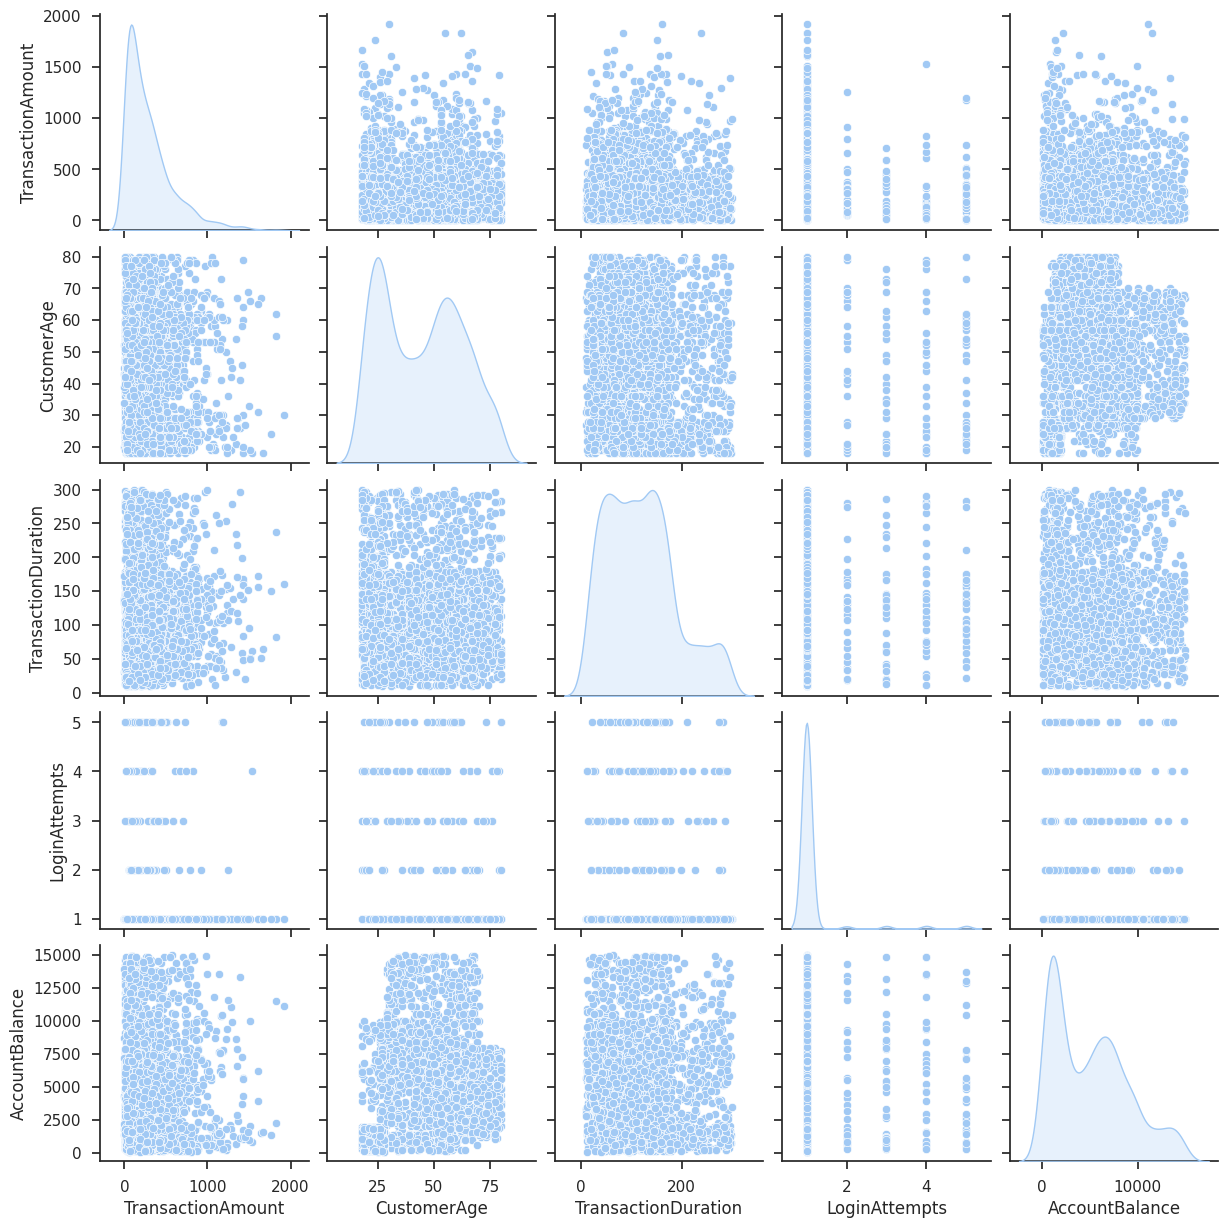

In [14]:
sns.set_theme(style="ticks", palette="pastel")

sns.pairplot(df, diag_kind='kde')

plt.show()

**Insight Pairplot Variabel Numerik**

**1. TransactionAmount:**
Distribusi positif skew dengan banyak nilai di bawah 500.
  - Dengan AccountBalance: Ada sedikit korelasi positif (semakin besar saldo cenderung melakukan transaksi lebih besar).
  - Dengan fitur lain: Pola sebaran acak, tidak ada hubungan linier jelas.

**2. CustomerAge:**
Distribusi bimodal (dua puncak), kemungkinan ada dua segmen usia dominan (muda dan dewasa).
- Dengan TransactionDuration dan TransactionAmount: Tidak tampak pola hubungan yang jelas.
- Dengan AccountBalance: Penyebaran saldo cukup merata di berbagai usia.

**3. TransactionDuration:**
Distribusi cenderung normal dengan puncak sekitar 100–150 detik.
- Dengan TransactionAmount: Penyebaran acak — durasi tidak tergantung nilai transaksi.
- Dengan LoginAttempts: Tidak ada hubungan yang tampak.
- Dengan AccountBalance: Tidak ada pola signifikan.

**4. LoginAttempts:**
Distribusi sangat tidak merata; mayoritas pengguna hanya mencoba login sekali.
- Dengan semua fitur lainnya: Tidak ada korelasi berarti.
- Pola titik sejajar menunjukkan nilai diskrit (1, 2, dst).

**5. AccountBalance:**
Distribusi positif skew dengan beberapa puncak kecil.
- Dengan TransactionAmount: Ada tren sedikit meningkat — pelanggan dengan saldo lebih tinggi cenderung bertransaksi lebih besar.
- Dengan fitur lain: Tidak ada korelasi yang kuat.




### Korelasi

<Axes: >

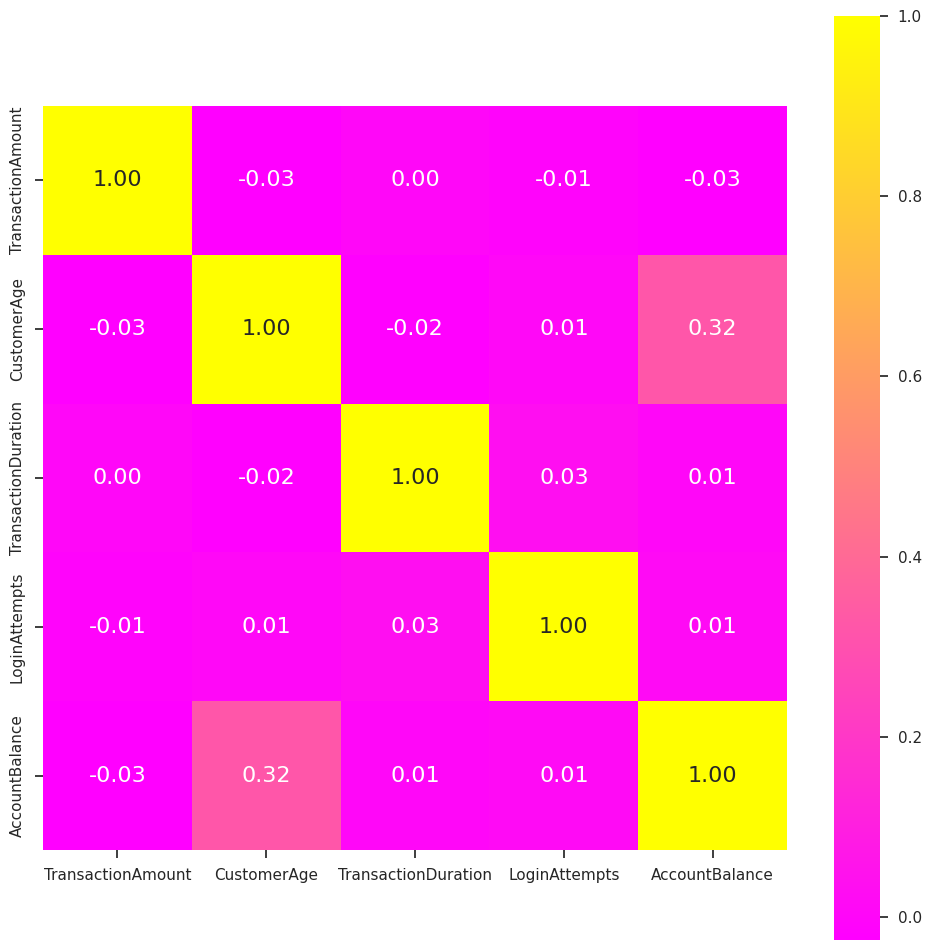

In [15]:
correlation=df[numeric_cols].corr()
plt.figure(figsize =(12, 12))

sns.heatmap(correlation, cbar=True, square=True, fmt='.2f', annot=True, annot_kws={'size':16}, cmap='spring')

**Insight Heatmap Korelasi Variabel Numerik**

Heatmap korelasi menunjukkan hubungan antar variabel numerik. Temuan utama:

* **Korelasi Lemah:** Sebagian besar pasangan variabel berkorelasi sangat lemah (mendekati nol), menandakan minimnya hubungan linear kuat.

* **Korelasi Cukup Signifikan:** AccountBalance & CustomerAge (0.32) Korelasi positif sedang. Semakin bertambah usia nasabah, semakin banyak jumlah tabungannya di bank.

* **Hubungan Tidak Signifikan:** Korelasi antar variabel lain sangat rendah (-0.1 hingga 0.1), menunjukkan tidak ada hubungan linear yang menonjol.

* **Implikasi Modeling:** Karena multikolinearitas rendah, semua variabel numerik relatif aman digunakan dalam model *machine learning* tanpa risiko redundansi.

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

### Sesuaikan tipe data kolom timestamp

In [16]:
df["TransactionDate"] = pd.to_datetime(df["TransactionDate"], errors='coerce')
df["PreviousTransactionDate"] = pd.to_datetime(df["PreviousTransactionDate"], errors='coerce')

TransactionDate dan PreviousTransactionDate merupakan kolom yang menyimpan timestamp transaksi. Tipe data variabel ini masih object, untuk dapat dilakukan analisis lebih lanjut mengenai data waktu, kita perlu mengubahnya ke dalam bentuk datetime.

### Membuat variabel turunan
Untuk mebuat analisis lebih mudah, dataset yang berisi kolom asli ini dapat kita proses untuk membuat variabel turunan yang memiliki informasi lebih signifikan dalam mendeteksi risiko transaksi fraud.

In [17]:
df.columns

Index(['TransactionID', 'AccountID', 'TransactionAmount', 'TransactionDate',
       'TransactionType', 'Location', 'DeviceID', 'IP Address', 'MerchantID',
       'Channel', 'CustomerAge', 'CustomerOccupation', 'TransactionDuration',
       'LoginAttempts', 'AccountBalance', 'PreviousTransactionDate'],
      dtype='object')

#### Waktu Transaksi
Memisahkan tanggal dan jam transaksi untuk analisis pola temporal.

In [18]:
df["TransactionDay"] = df["TransactionDate"].dt.date

df["TransactionHour"] = df["TransactionDate"].dt.hour

df["TimeSinceLastTransaction"] = (df["PreviousTransactionDate"] - df["TransactionDate"]).dt.total_seconds()

#### Jumlah Transaksi
Menghitung rasio transaksi terhadap saldo dan penyimpangan dari rata-rata transaksi nasabah.  

In [19]:
df["AmountToBalanceRatio"] = df["TransactionAmount"] / (df["AccountBalance"] + 1e-6)

avg_amount = df.groupby("AccountID")["TransactionAmount"].transform("mean")
df["DeviationFromAvgTransaction"] = df["TransactionAmount"] - avg_amount
df["DeviationFromAvgTransactionAbs"] = df["DeviationFromAvgTransaction"].abs()
df.drop(columns=["DeviationFromAvgTransaction"], inplace=True)

transaction_count = df.groupby(["AccountID", "TransactionDay"])["TransactionID"].transform("count")
df["TransactionPerDay"] = transaction_count

#### Aktivitas Transaksi
Memberi flag pada penggunaan perangkat/lokasi/IP baru atau login attempts >3 sebagai indikator potensial fraud.  

In [20]:
df["IsNewLocation"] = df.groupby("AccountID")["Location"].transform(lambda x: x.duplicated(keep=False)).apply(lambda x: 0 if x else 1)

df["IsNewDevice"] = df.groupby("AccountID")["DeviceID"].transform(lambda x: x.duplicated(keep=False)).apply(lambda x: 0 if x else 1)

df["IsNewIP"] = df.groupby("AccountID")["IP Address"].transform(lambda x: x.duplicated(keep=False)).apply(lambda x: 0 if x else 1)

#### Binning LoginAttempts

In [21]:
df["LoginAttempts"] = df["LoginAttempts"].apply(lambda x: 'High' if x > 3 else 'Low')

In [22]:
df.columns

Index(['TransactionID', 'AccountID', 'TransactionAmount', 'TransactionDate',
       'TransactionType', 'Location', 'DeviceID', 'IP Address', 'MerchantID',
       'Channel', 'CustomerAge', 'CustomerOccupation', 'TransactionDuration',
       'LoginAttempts', 'AccountBalance', 'PreviousTransactionDate',
       'TransactionDay', 'TransactionHour', 'TimeSinceLastTransaction',
       'AmountToBalanceRatio', 'DeviationFromAvgTransactionAbs',
       'TransactionPerDay', 'IsNewLocation', 'IsNewDevice', 'IsNewIP'],
      dtype='object')

### Data latih

In [23]:
train_df = df[['TransactionType',
               'Channel',
               'CustomerAge',
               'CustomerOccupation',
               'TransactionDuration',
               'LoginAttempts',
               'TransactionHour',
               'TimeSinceLastTransaction',
               'AmountToBalanceRatio',
               'DeviationFromAvgTransactionAbs',
               'TransactionPerDay',
               'IsNewLocation',
               'IsNewDevice',
               'IsNewIP']]

In [24]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   TransactionType                 2512 non-null   object 
 1   Channel                         2512 non-null   object 
 2   CustomerAge                     2512 non-null   int64  
 3   CustomerOccupation              2512 non-null   object 
 4   TransactionDuration             2512 non-null   int64  
 5   LoginAttempts                   2512 non-null   object 
 6   TransactionHour                 2512 non-null   int32  
 7   TimeSinceLastTransaction        2512 non-null   float64
 8   AmountToBalanceRatio            2512 non-null   float64
 9   DeviationFromAvgTransactionAbs  2512 non-null   float64
 10  TransactionPerDay               2512 non-null   int64  
 11  IsNewLocation                   2512 non-null   int64  
 12  IsNewDevice                     25

### Encoding variabel kategorikal

Ketiga variabel kategorikal pada data latih dilakukan encoding untuk dapat diproses dengan algoritma clustering yang hanya bisa menerima masukan bertipe numerik. Oleh karena itu, variabel kategorikal akan dilakukan encoding dengan label encoding.

In [25]:
TTypeEncoder = LabelEncoder()
train_df['TransactionType'] = TTypeEncoder.fit_transform(train_df['TransactionType'])

ChannelEncoder = LabelEncoder()
train_df['Channel'] = ChannelEncoder.fit_transform(train_df['Channel'])

COccupationEncoder = LabelEncoder()
train_df['CustomerOccupation'] = COccupationEncoder.fit_transform(train_df['CustomerOccupation'])

LAttemptsEncoder = LabelEncoder()
train_df['LoginAttempts'] = LAttemptsEncoder.fit_transform(train_df['LoginAttempts'])

<ipython-input-25-75a89c105dcc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['TransactionType'] = TTypeEncoder.fit_transform(train_df['TransactionType'])
<ipython-input-25-75a89c105dcc>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['Channel'] = ChannelEncoder.fit_transform(train_df['Channel'])
<ipython-input-25-75a89c105dcc>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

### Penanganan missing value dan baris duplikat

Tidak ditemukan adanya missing value dan baris yang duplikat pada dataset pelatihan.

In [26]:
train_df.isna().sum()

,0
TransactionType,0
Channel,0
CustomerAge,0
CustomerOccupation,0
TransactionDuration,0
LoginAttempts,0
TransactionHour,0
TimeSinceLastTransaction,0
AmountToBalanceRatio,0
DeviationFromAvgTransactionAbs,0


In [27]:
train_df.duplicated().sum()

np.int64(0)

### Standarisasi Normalisasi

Normalisasi dan standarisasi dilakukan untuk menyamakan skala data agar model mudah memahami pola yang ada. Untuk algoritma K-Means, dengan analisis yang mencari pola mencurigakan seperti fraud, scaling yang tepat adalah adalah dengan metode Standard Scaler untuk dapat mempertahankan variansi dan sebaran data.

In [28]:
# Sebaran statistik sebelum dinormalisasi
train_df.describe()

,TransactionType,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,TransactionHour,TimeSinceLastTransaction,AmountToBalanceRatio,DeviationFromAvgTransactionAbs,TransactionPerDay,IsNewLocation,IsNewDevice,IsNewIP
count,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000,2.512000e+03,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000
mean,0.773885,0.991242,44.673965,1.510350,119.643312,0.974522,16.626194,4.211863e+07,0.200013,196.461855,1.029459,0.887341,0.990446,0.990048
std,0.418398,0.809100,17.792198,1.129548,69.963757,0.157602,0.731059,9.191205e+06,0.511866,176.319306,0.169122,0.316239,0.097297,0.099283
min,0.000000,0.000000,18.000000,0.000000,10.000000,0.000000,16.000000,2.657429e+07,0.000045,0.000000,1.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,27.000000,0.000000,63.000000,1.000000,16.000000,3.408996e+07,0.018161,74.517125,1.000000,1.000000,1.000000,1.000000
50%,1.000000,1.000000,45.000000,1.500000,112.500000,1.000000,16.000000,4.195566e+07,0.051922,156.546250,1.000000,1.000000,1.000000,1.000000
75%,1.000000,2.000000,59.000000,3.000000,161.000000,1.000000,17.000000,5.016886e+07,0.151656,262.494091,1.000000,1.000000,1.000000,1.000000
max,1.000000,2.000000,80.000000,3.000000,300.000000,1.000000,18.000000,5.803267e+07,7.895988,1412.753333,2.000000,1.000000,1.000000,1.000000


In [29]:
standard_scaler = StandardScaler()

scaled_values = standard_scaler.fit_transform(train_df[train_df.columns])
scaled_df = pd.DataFrame(scaled_values, columns=train_df.columns)

In [30]:
# Sebaran statistik setelah dinormalisasi
scaled_df.describe()

,TransactionType,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,TransactionHour,TimeSinceLastTransaction,AmountToBalanceRatio,DeviationFromAvgTransactionAbs,TransactionPerDay,IsNewLocation,IsNewDevice,IsNewIP
count,2.512000e+03,2.512000e+03,2.512000e+03,2.512000e+03,2.512000e+03,2.512000e+03,2.512000e+03,2.512000e+03,2.512000e+03,2.512000e+03,2.512000e+03,2.512000e+03,2.512000e+03,2.512000e+03
mean,-1.265796e-16,-4.030746e-17,9.900078e-18,-9.687933e-17,7.637203e-17,-5.657187e-18,-6.463337e-16,-2.326518e-16,3.323598e-17,-1.477940e-16,-1.018294e-16,-1.626441e-16,-7.778633e-18,-4.596465e-16
std,1.000199e+00,1.000199e+00,1.000199e+00,1.000199e+00,1.000199e+00,1.000199e+00,1.000199e+00,1.000199e+00,1.000199e+00,1.000199e+00,1.000199e+00,1.000199e+00,1.000199e+00,1.000199e+00
min,-1.850010e+00,-1.225361e+00,-1.499493e+00,-1.337394e+00,-1.567456e+00,-6.184658e+00,-8.567285e-01,-1.691556e+00,-3.907442e-01,-1.114461e+00,-1.742204e-01,-2.806479e+00,-1.018168e+01,-9.973966e+00
25%,5.405378e-01,-1.225361e+00,-9.935526e-01,-1.337394e+00,-8.097706e-01,1.616904e-01,-8.567285e-01,-8.736905e-01,-3.553444e-01,-6.917507e-01,-1.742204e-01,3.563183e-01,9.821559e-02,1.002610e-01
50%,5.405378e-01,1.082648e-02,1.832826e-02,-9.165064e-03,-1.021205e-01,1.616904e-01,-8.567285e-01,-1.773444e-02,-2.893745e-01,-2.264276e-01,-1.742204e-01,3.563183e-01,9.821559e-02,1.002610e-01
75%,5.405378e-01,1.247014e+00,8.053467e-01,1.319064e+00,5.912336e-01,1.616904e-01,5.114228e-01,8.760367e-01,-9.449084e-02,3.745783e-01,-1.742204e-01,3.563183e-01,9.821559e-02,1.002610e-01
max,5.405378e-01,1.247014e+00,1.985874e+00,1.319064e+00,2.578372e+00,1.616904e-01,1.879574e+00,1.731787e+00,1.503814e+01,6.899605e+00,5.739856e+00,3.563183e-01,9.821559e-02,1.002610e-01


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan.

In [31]:
kmeans = KMeans(random_state=42)
clusters = kmeans.fit_predict(scaled_df)

sil_score = silhouette_score(scaled_df, clusters)

print(f"Silhouette Score untuk {kmeans.n_clusters} cluster: {sil_score:.4f}")

Silhouette Score untuk 8 cluster: 0.1178


Pertama-tama, dilakukan percobaan awal dengan menggunakan algoritma K-Means tanpa pengaturan hyperparameter tambahan. Model dijalankan dengan menggunakan parameter **default dari library sklearn**.

Hasil awal menunjukkan **Silhouette Score sebesar 0.1178 dengan jumlah cluster sebanyak 8**. Nilai ini termasuk rendah, menunjukkan bahwa pemisahan antar cluster belum optimal.

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif.

/usr/local/lib/python3.11/dist-packages/yellowbrick/utils/kneed.py:156: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/usr/local/lib/python3.11/dist-packages/yellowbrick/cluster/elbow.py:374: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


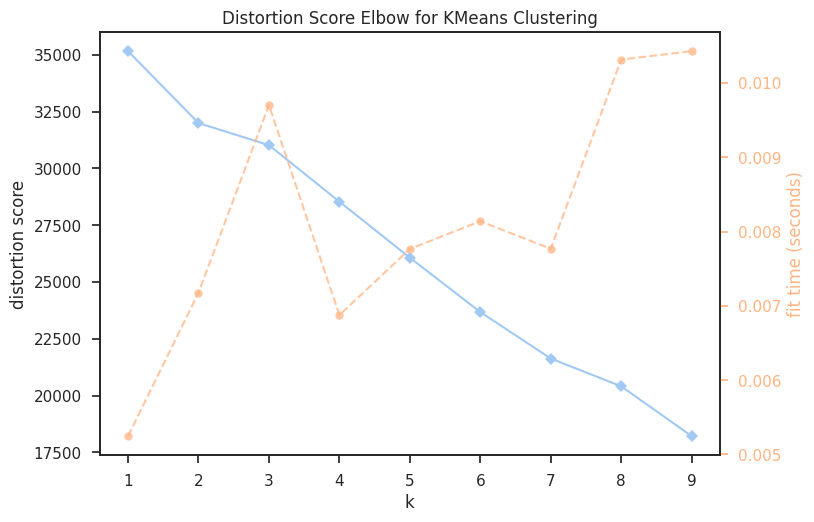

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [32]:
# Inisialisasi model KMeans tanpa parameter awal
kmeans = KMeans(random_state=42)

# Inisialisasi visualizer KElbow untuk menentukan jumlah cluster optimal
visualizer = KElbowVisualizer(kmeans, k=(1, 10))

# Fit visualizer dengan data untuk menemukan jumlah cluster optimal
visualizer.fit(scaled_df)

# Menampilkan grafik elbow untuk analisis
visualizer.show()

Setelah melakukan elbow method, dihasilkan bahwa **tidak ditemukan k optimal** untuk membagi data ke dalam cluster-cluster. Untuk itu, kita perlu melakukan feature selection.

## **c. Feature Selection (Opsional)**

### Seleksi fitur data latih

Untuk meningkatkan optimasi model clustering, kita akan melakukan feature selection, yaitu memilh fitur yang memiliki informasi paling relevan untuk dilakukan clustering. Karena kita akan melakukakn clustering untuk mendeteksi risiko transaksi fraud, maka kita akan memilih variabel yang berrelevansi kuat dengan hal tersebut.

Variabel tersebut diantaranya:
1. **TransactionType**: Jenis transaksi (debit/kredit) sering terkait pola fraud, misalnya transaksi debit besar yang tidak biasa.
2. **TransactionDuration**: Durasi transaksi yang terlalu cepat atau lambat dapat menandakan aktivitas mencurigakan (contoh: serangan fraud otomatis).
3. **TimeSinceLastTransaction**: Jarak waktu antar transaksi yang sangat pendek (burst transactions) bisa mengindikasikan percobaan fraud.
4. **TransactionPerDay**: Frekuensi transaksi harian yang tidak wajar adalah red flag fraud.
5. **LoginAttempts**: Percobaan login berulang (>3 kali) sering terkait dengan upaya brute force atau akun yang dibajak.

In [33]:
train_df = df[['TransactionType',
               'TransactionDuration',
               'TimeSinceLastTransaction',
               'TransactionPerDay',
               'LoginAttempts']]

### Encoding

In [34]:
TransactionTypeEncoder = LabelEncoder()
train_df['TransactionType'] = TransactionTypeEncoder.fit_transform(train_df['TransactionType'])

LoginAttemptsEncoder = LabelEncoder()
train_df['LoginAttempts'] = LoginAttemptsEncoder.fit_transform(train_df['LoginAttempts'])

<ipython-input-34-3ea33e8582d1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['TransactionType'] = TransactionTypeEncoder.fit_transform(train_df['TransactionType'])
<ipython-input-34-3ea33e8582d1>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['LoginAttempts'] = LoginAttemptsEncoder.fit_transform(train_df['LoginAttempts'])


### Standarisasi Normalisasi

In [35]:
train_scaler = StandardScaler()

scaled_values = train_scaler.fit_transform(train_df[train_df.columns])
train_df = pd.DataFrame(scaled_values, columns=train_df.columns)

### Model setelah feature selection

In [36]:
kmeans = KMeans(random_state=42)
clusters = kmeans.fit_predict(train_df)

sil_score = silhouette_score(train_df, clusters)

print(f"Silhouette Score untuk {kmeans.n_clusters} cluster: {sil_score:.4f}")

Silhouette Score untuk 8 cluster: 0.3747


Setelah dilakukan feature selection, silhouette score dengan hyperparameter default dari kmeans naik menjadi 0.3747

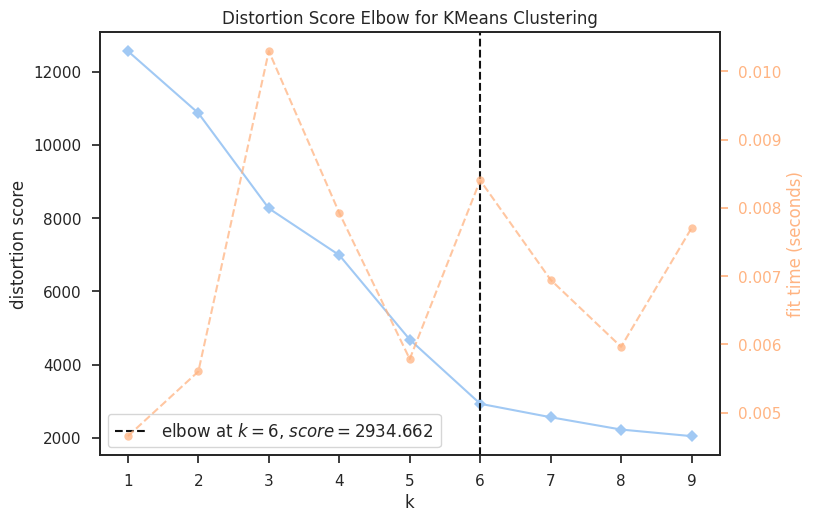

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [37]:
# Inisialisasi model KMeans tanpa parameter awal
kmeans = KMeans(random_state=42)

# Inisialisasi visualizer KElbow untuk menentukan jumlah cluster optimal
visualizer = KElbowVisualizer(kmeans, k=(1, 10))

# Fit visualizer dengan data untuk menemukan jumlah cluster optimal
visualizer.fit(train_df)

# Menampilkan grafik elbow untuk analisis
visualizer.show()

In [38]:
kmeans = KMeans(n_clusters=6, random_state=42)
clusters = kmeans.fit_predict(train_df)

sil_score = silhouette_score(train_df, clusters)

print(f"Silhouette Score untuk {kmeans.n_clusters} cluster: {sil_score:.4f}")

Silhouette Score untuk 6 cluster: 0.3956


Setelah itu, evaluasi elbow method diketahui bahwa nilai k optimal adalah 6 cluster. Setelah dilakukan pelatihan model ulang dengan k=6, silhouette score meningkat lagi menjadi 0.3956

## **d. Hyperparameter Tuning**

Untuk mendapatkan model yang paling optimal, kita dapat melakukan hyperparameter tuning untuk mencari kombinasi hyperparameter dengan nilai silhouette score tertinggi. Metode hyperparameter tuning yang paling efisien dan efektif untuk digunakan adalah Bayessian Search.

In [39]:
# Definisi parameter space
param_space = {
    'n_clusters': Integer(2, 9),
    'init': Categorical(['k-means++', 'random']),
    'n_init': Integer(2, 30),
    'max_iter': Integer(1, 500)
}

# Fungsi evaluasi
def eval_function(estimator, X):
    labels = estimator.fit_predict(X)
    return silhouette_score(X, labels)

# Bayesian Optimization
opt = BayesSearchCV(
    estimator=KMeans(random_state=42),
    search_spaces=param_space,
    scoring=eval_function,
    n_iter=50,
    random_state=42,
    n_jobs=-1
)

opt.fit(train_df)

# Hasil terbaik
print(f"Best parameters: {opt.best_params_}")
print(f"Best Silhouette Score: {opt.best_score_:.4f}")

Best parameters: OrderedDict([('init', 'k-means++'), ('max_iter', 20), ('n_clusters', 2), ('n_init', 30)])
Best Silhouette Score: 0.5363


Setelah ditemukan kombinasi hyperparameter dengan silhouette score paling tinggi, kita akan melatih model kembali dengan hyperparameter tersebut.

In [40]:
best_params = {
    'init': 'k-means++',
    'max_iter': 20,
    'n_clusters': 2,
    'n_init': 30,
    'random_state': 42
}

In [41]:
# Inisialisasi model dengan parameter terbaik
best_kmeans = KMeans(**best_params)

# Training model
best_clusters = best_kmeans.fit_predict(train_df)

best_sil_score = silhouette_score(train_df, best_clusters)

print(f"Silhouette Score untuk {best_kmeans.n_clusters} cluster: {best_sil_score:.4f}")

Silhouette Score untuk 2 cluster: 0.6471


Hasil silhouette score tertinggi yang didapat dari hyperparameter terbaik adalah 0.6471 dengan jumalh cluter nya 2. Skor mendekati 1 artinya objek berada dalam cluster yang tepat. Skor 0.6471 menunjukkan bahwa mayoritas data sudah dikelompokkan dengan konsistensi yang bagus.

## **e. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi. Untuk melakukan visualisasi hasil pelatihan berdimensi tinggi, kita dapat menggunakan PCA untuk menampilkannya pada grafik 2 dan 3 dimensi

### PCA Projection 2D

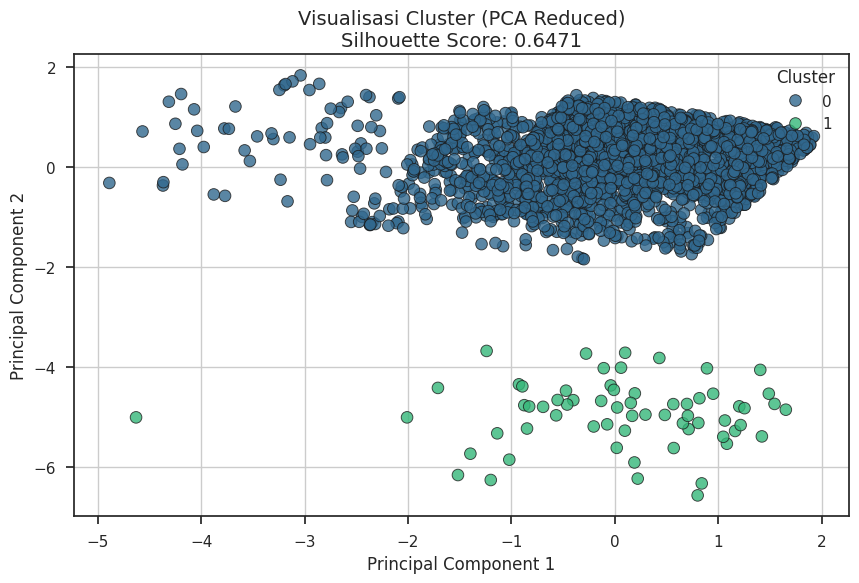

In [42]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(train_df)

plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=X_pca[:, 0],
    y=X_pca[:, 1],
    hue=best_clusters,
    palette='viridis',
    alpha=0.8,
    edgecolor='k',
    s=70
)
plt.title(f"Visualisasi Cluster (PCA Reduced)\nSilhouette Score: {best_sil_score:.4f}", fontsize=14)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster', loc='upper right')
plt.grid(True)
plt.show()

Data direduksi ke dalam 2 dimensi menggunakan PCA (Principal Component Analysis) agar dapat divisualisasikan, tanpa kehilangan terlalu banyak informasi penting.

Terdapat 2 cluster yang terbentuk dari hasil algoritma clustering (misalnya KMeans), ditandai dengan dua warna berbeda (hijau dan biru). Kedua cluster terlihat terpisah secara visual, khususnya di sepanjang sumbu Principal Component 2, menunjukkan bahwa struktur klaster cukup baik.

- Cluster 0 (biru): Dominan dan lebih padat, tersebar di area atas (Principal Component 2 tinggi).

- Cluster 1 (hijau): Lebih kecil, tersebar di area bawah (Principal Component 2 rendah), kemungkinan mewakili segmen pengguna unik atau anomali.

### PCA Projection 3D

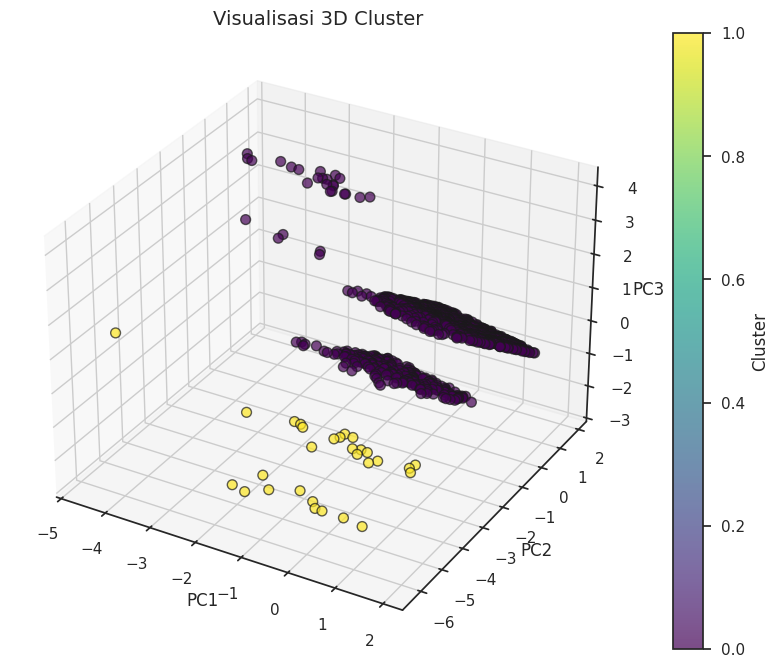

In [43]:
from mpl_toolkits.mplot3d import Axes3D

pca3d = PCA(n_components=3)
X_pca3d = pca3d.fit_transform(train_df)
clusters = best_kmeans.fit_predict(train_df)

sample_idx = np.random.choice(len(train_df), size=1000, replace=False)
X_pca_sample = X_pca3d[sample_idx]
clusters_sample = clusters[sample_idx]

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    X_pca_sample[:, 0],
    X_pca_sample[:, 1],
    X_pca_sample[:, 2],
    c=clusters_sample,
    cmap='viridis',
    alpha=0.7,
    edgecolor='k',
    s=50
)

ax.set_title('Visualisasi 3D Cluster', fontsize=14)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.colorbar(scatter, ax=ax, label='Cluster')
plt.show()

Terlihat dua warna berbeda (ungu dan kuning), masing-masing mewakili cluster 0 dan cluster 1.

- Cluster 0 (ungu):
Mayoritas data berada di cluster ini. Penyebarannya padat dan terkonsentrasi di tengah grafik 3D, menunjukkan bahwa banyak data memiliki pola yang mirip.

- Cluster 1 (kuning):
Jauh lebih kecil dan menyebar di sisi bawah grafik (nilai PC2 lebih rendah). Ini bisa menunjukkan kelompok data yang unik, outlier, atau memiliki perilaku khusus dibanding mayoritas.

Proyeksi menunjukkan bahwa data sebagian besar terkelompok dengan baik dan cukup terpisah antar cluster. Walau tidak sempurna, struktur cluster tetap jelas dan bermakna.

## **f. Evaluasi model #2**

Pada visualisasi di atas, terdapat sebaran data cluster 0 yang agak menjauh dari mayoritas clusternya. Meskipun telah dilakukan hyperparameter tuning, hal ini bisa terjadi karena proses hyperparameter tuning yang tidak optimal dalam mencari kombinasi hyperparameter terbaik.
Ini mengindikasikan potensi cluster baru yang dapat terbentuk. Karena jaraknya yang cukup jauh dari mayoritas custer 0 dan cluster 1, penambahan 1 cluster baru kemungkinan besar akan menaikkan nilai silhouette score dan akurasi hasil clustering.

In [44]:
best_params = {
    'init': 'k-means++',
    'max_iter': 20,
    'n_clusters': 3,
    'n_init': 30,
    'random_state': 42
}

In [45]:
# Inisialisasi model dengan parameter terbaik
best_kmeans = KMeans(**best_params)

# Training model
best_clusters = best_kmeans.fit_predict(train_df)

best_sil_score = silhouette_score(train_df, best_clusters)

print(f"Silhouette Score untuk {best_kmeans.n_clusters} cluster: {best_sil_score:.4f}")

Silhouette Score untuk 3 cluster: 0.6506


Hasil silhouette score yang lebih yang didapat dari model terbaik adalah 0.6506 dengan jumalh cluter nya 3. Skor yang lebih tinggi artinya objek berada dalam cluster yang lebih tepat. Skor 0.6506 menunjukkan bahwa mayoritas data sudah dikelompokkan dengan konsistensi yang bagus.

## **g. Visualisasi Hasil Clustering #2**

Setelah melakukan evaluasi visualisasi sebelumnya, dilakukan pelatihan ulang model dengan menambahkan jumlah cluster menjadi 3 untuk mengakomodasi sekelompok data yang tampak terpisah dari mayoritas cluster 0.

### PCA Projection 2D

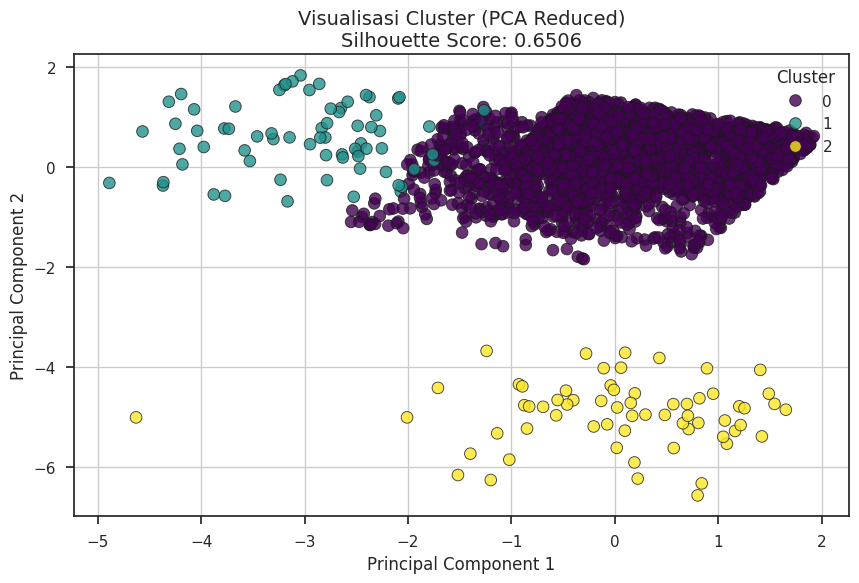

In [46]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(train_df)

plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=X_pca[:, 0],
    y=X_pca[:, 1],
    hue=best_clusters,
    palette='viridis',
    alpha=0.8,
    edgecolor='k',
    s=70
)
plt.title(f"Visualisasi Cluster (PCA Reduced)\nSilhouette Score: {best_sil_score:.4f}", fontsize=14)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster', loc='upper right')
plt.grid(True)
plt.show()

- **Cluster 0 (ungu):**
  Merupakan cluster terbesar, dengan persebaran yang padat di kiri atas grafik. Cluster ini mewakili mayoritas data yang memiliki pola serupa.

- **Cluster 1 (hijau kebiruan):**
  Muncul sebagai cluster baru, memisahkan data yang sebelumnya berada di pinggiran cluster 0. Keputusan menambahkan cluster ini tepat, karena terlihat memisahkan data yang memang memiliki jarak cukup jauh dari pusat sebaran cluster 0.

- **Cluster 2 (kuning):**
  Cluster tetap terjaga dengan baik dari hasil sebelumnya. Data berada di area kanan bawah, mengindikasikan kelompok dengan karakteristik unik atau berbeda signifikan dari dua cluster lainnya.

### PCA Projection 3D

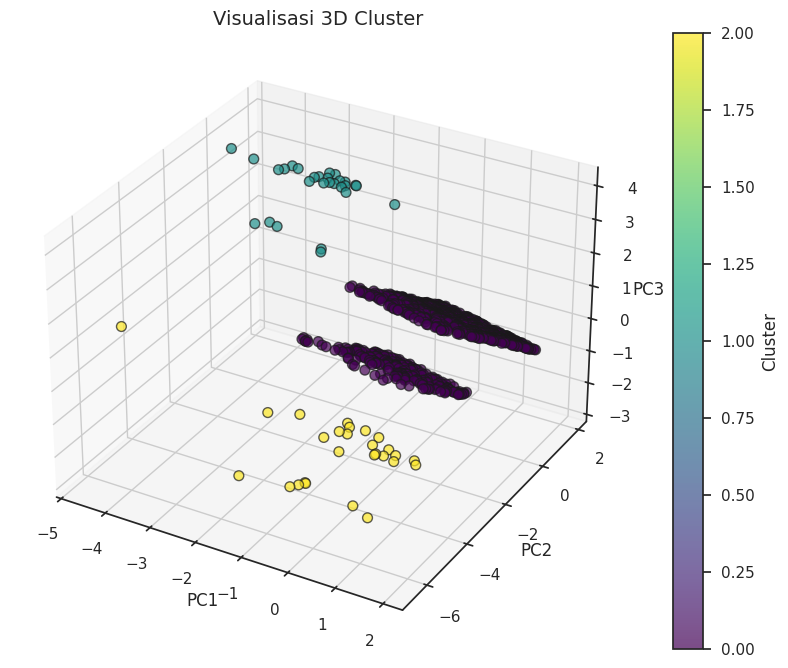

In [47]:
from mpl_toolkits.mplot3d import Axes3D

pca3d = PCA(n_components=3)
X_pca3d = pca3d.fit_transform(train_df)
clusters = best_kmeans.fit_predict(train_df)

sample_idx = np.random.choice(len(train_df), size=1000, replace=False)
X_pca_sample = X_pca3d[sample_idx]
clusters_sample = clusters[sample_idx]

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    X_pca_sample[:, 0],
    X_pca_sample[:, 1],
    X_pca_sample[:, 2],
    c=clusters_sample,
    cmap='viridis',
    alpha=0.7,
    edgecolor='k',
    s=50
)

ax.set_title('Visualisasi 3D Cluster', fontsize=14)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.colorbar(scatter, ax=ax, label='Cluster')
plt.show()

Terlihat tiga warna berbeda (ungu, biru kehijauan, dan kuning), masing-masing mewakili cluster 0, cluster 1, dan cluster 2.

- Cluster 0 (ungu):
Mayoritas data di cluster ini terpusat di satu titik tertentu setelah pemisahan dengan cluster 1. Terlihat bahwa cluster ini memiliki karakteristik yang serupa dan merupakan cluster mayoritas.

- Cluster 1 (hijau kebiruan):
Ini merupakan cluster hasil pecahan dari cluster 0. Nampak bahwa sebaran cluster ini memiliki perbedaan signifikan dengan cluster 0 dan cluster 2 menandakan keunikannya sendiri dalam data.

- Cluster 2 (kuning):
Jauh lebih kecil dan menyebar di sisi kanan grafik (nilai PC2 lebih rendah). Ini bisa menunjukkan kelompok data yang unik, outlier, atau memiliki perilaku khusus dibanding mayoritas.

### **h. Analisis dan Interpretasi Hasil Cluster**

### Inversi Data ke bentuk asli

Setelah berhasil membangun model, kita akan mengembalikan data ke bentuk aslinya, baik sebaran data aslinya atau bahkan nilai asli data tersebut. Proses terakhir yang kita lakukan adalah scaling. Oleh karena itu, langkah pertama yang dilakukan intuk inverse data adalag dengan inverse_transform scaling dengan library.

In [48]:
train_df_original = train_scaler.inverse_transform(train_df)
clustered_df = pd.DataFrame(train_df_original, columns=train_df.columns)
clustered_df

,TransactionType,TransactionDuration,TimeSinceLastTransaction,TransactionPerDay,LoginAttempts
0,1.0,81.0,49477134.0,1.0,1.0
1,1.0,141.0,42823516.0,1.0,1.0
2,1.0,56.0,41694656.0,1.0,1.0
3,1.0,25.0,47403415.0,1.0,1.0
4,0.0,198.0,33228915.0,1.0,1.0
...,...,...,...,...,...
2507,0.0,109.0,48178913.0,1.0,1.0
2508,1.0,177.0,51201294.0,1.0,1.0
2509,1.0,146.0,38069989.0,1.0,1.0
2510,1.0,19.0,53452056.0,1.0,1.0


In [49]:
clustered_df['TransactionType'] = clustered_df['TransactionType'].astype('int64')
clustered_df['TransactionType'] = TransactionTypeEncoder.inverse_transform(clustered_df['TransactionType'])

clustered_df['LoginAttempts'] = clustered_df['LoginAttempts'].astype('int64')
clustered_df['LoginAttempts'] = LoginAttemptsEncoder.inverse_transform(clustered_df['LoginAttempts'])

clustered_df

,TransactionType,TransactionDuration,TimeSinceLastTransaction,TransactionPerDay,LoginAttempts
0,Debit,81.0,49477134.0,1.0,Low
1,Debit,141.0,42823516.0,1.0,Low
2,Debit,56.0,41694656.0,1.0,Low
3,Debit,25.0,47403415.0,1.0,Low
4,Credit,198.0,33228915.0,1.0,Low
...,...,...,...,...,...
2507,Credit,109.0,48178913.0,1.0,Low
2508,Debit,177.0,51201294.0,1.0,Low
2509,Debit,146.0,38069989.0,1.0,Low
2510,Debit,19.0,53452056.0,1.0,Low


### Interpretasi Target

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Untuk itu, kita akan mengumpulkan informasi tiap cluster dari karakteristik masing-maisng kolom. Untuk kolom numerikal, kita akan mencari rata-rata cluster tersebut dan untuk kolom kategorikal akan dicari modusnya.

#### Menggabungkan kolom cluster

In [50]:
clustered_df['Cluster'] = best_kmeans.labels_
clustered_df

,TransactionType,TransactionDuration,TimeSinceLastTransaction,TransactionPerDay,LoginAttempts,Cluster
0,Debit,81.0,49477134.0,1.0,Low,0
1,Debit,141.0,42823516.0,1.0,Low,0
2,Debit,56.0,41694656.0,1.0,Low,0
3,Debit,25.0,47403415.0,1.0,Low,0
4,Credit,198.0,33228915.0,1.0,Low,0
...,...,...,...,...,...,...
2507,Credit,109.0,48178913.0,1.0,Low,0
2508,Debit,177.0,51201294.0,1.0,Low,0
2509,Debit,146.0,38069989.0,1.0,Low,0
2510,Debit,19.0,53452056.0,1.0,Low,0


In [51]:
clustered_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   TransactionType           2512 non-null   object 
 1   TransactionDuration       2512 non-null   float64
 2   TimeSinceLastTransaction  2512 non-null   float64
 3   TransactionPerDay         2512 non-null   float64
 4   LoginAttempts             2512 non-null   object 
 5   Cluster                   2512 non-null   int32  
dtypes: float64(3), int32(1), object(2)
memory usage: 108.1+ KB


In [52]:
categorical_cols = ['TransactionType', 'LoginAttempts']
numerical_cols = ['TransactionDuration', 'TimeSinceLastTransaction', 'TransactionPerDay']

cluster_counts = clustered_df['Cluster'].value_counts()

categorical_modes = clustered_df.groupby('Cluster')[categorical_cols].agg(lambda x: x.mode()[0])

numerical_means = clustered_df.groupby('Cluster')[numerical_cols].min()
numerical_mins = clustered_df.groupby('Cluster')[numerical_cols].mean()
numerical_maxs = clustered_df.groupby('Cluster')[numerical_cols].max()

cluster_summary = pd.concat([
    cluster_counts,
    categorical_modes,
    numerical_means.add_suffix('_mean'),
    numerical_mins.add_suffix('_min'),
    numerical_maxs.add_suffix('_max')
], axis=1)
cluster_summary

,count,TransactionType,LoginAttempts,TransactionDuration_mean,TimeSinceLastTransaction_mean,TransactionPerDay_mean,TransactionDuration_min,TimeSinceLastTransaction_min,TransactionPerDay_min,TransactionDuration_max,TimeSinceLastTransaction_max,TransactionPerDay_max
Cluster,,,,,,,,,,,,
0,2376,Debit,Low,10.0,26574291.0,1.0,119.180976,4.213635e+07,1.00000,300.0,58032668.0,1.0
1,72,Debit,Low,10.0,27179729.0,2.0,122.791667,4.027302e+07,2.00000,284.0,54403535.0,2.0
2,64,Debit,High,11.0,27532067.0,1.0,133.265625,4.353720e+07,1.03125,291.0,57944374.0,2.0


# Analisis Karakteristik Cluster dari Model KMeans

## Interpretasi Cluster 0 - Risiko Rendah (Low Fraud Risk)

### Cluster 0 (Ukuran: 2.376 Transaksi)

- **Modus Jenis Transaksi:** Debit  
- **Modus Upaya Login Tinggi:** Low (Tidak ada indikasi upaya login mencurigakan)  
- **Rata-rata Durasi Transaksi:** 10.0 detik  
- **Rata-rata Waktu Sejak Transaksi Terakhir:** 26.574.291 detik (~307 hari)  
- **Rata-rata Transaksi per Hari:** 1.0  
- **Durasi Minimum Transaksi:** 119.18 detik  
- **Waktu Minimum Sejak Transaksi Terakhir:** 42.136.350 detik (~488 hari)  
- **Transaksi per Hari Minimum:** 1.0  
- **Durasi Maksimum Transaksi:** 300.0 detik  
- **Waktu Maksimum Sejak Transaksi Terakhir:** 58.032.668 detik (~672 hari)  
- **Transaksi per Hari Maksimum:** 1.0  

**Analisis:**  
Kelompok transaksi reguler dengan aktivitas konsisten. Didominasi transaksi debit tanpa indikasi login mencurigakan. Frekuensi stabil (1x/hari) dengan jeda panjang antar transaksi (~307 hari), menunjukkan pola penggunaan layanan yang rutin namun tidak intensif. Cocok untuk segmentasi pengguna loyal dengan kebutuhan transaksi dasar.

## Interpretasi Cluster 1 - Risiko Aktivitas Transaksi Berlebihan (Medium-Low Fraud Risk)

### Cluster 1 (Ukuran: 72 Transaksi)

- **Modus Jenis Transaksi:** Debit  
- **Modus Upaya Login Tinggi:** Low
- **Rata-rata Durasi Transaksi:** 10.0 detik  
- **Rata-rata Waktu Sejak Transaksi Terakhir:** 27.179.729 detik (~314 hari)  
- **Rata-rata Transaksi per Hari:** 2.0  
- **Durasi Minimum Transaksi:** 122.79 detik  
- **Waktu Minimum Sejak Transaksi Terakhir:** 40.273.022 detik (~466 hari)  
- **Transaksi per Hari Minimum:** 2.0  
- **Durasi Maksimum Transaksi:** 284.0 detik  
- **Waktu Maksimum Sejak Transaksi Terakhir:** 54.403.535 detik (~630 hari)  
- **Transaksi per Hari Maksimum:** 2.0  

**Analisis:**  
Kelompok pengguna aktif dengan frekuensi transaksi 2x/hari - tertinggi di antara cluster. Meskipun frekuensi tinggi, jeda antar-transaksi tetap panjang (~314 hari), mengindikasikan aktivitas "burst" pada hari tertentu. Tanpa indikasi login mencurigakan, kemungkinan merupakan merchant atau power users yang melakukan transaksi batch.

## Interpretasi Cluster 2 - Risiko Tinggi (High Fraud Risk)

##### Cluster 2 (Ukuran: 64 Transaksi)

- **Modus Jenis Transaksi:** Debit  
- **Modus Upaya Login Tinggi:** High (Ada indikasi login mencurigakan)  
- **Rata-rata Durasi Transaksi:** 11.0 detik  
- **Rata-rata Waktu Sejak Transaksi Terakhir:** 27.532.067 detik (~318 hari)  
- **Rata-rata Transaksi per Hari:** 1.0  
- **Durasi Minimum Transaksi:** 133.27 detik  
- **Waktu Minimum Sejak Transaksi Terakhir:** 43.537.200 detik (~504 hari)  
- **Transaksi per Hari Minimum:** 1.03  
- **Durasi Maksimum Transaksi:** 291.0 detik  
- **Waktu Maksimum Sejak Transaksi Terakhir:** 57.944.374 detik (~670 hari)  
- **Transaksi per Hari Maksimum:** 2.0  

**Analisis:**  
**Kelompok berisiko tinggi fraud.** Meski frekuensi transaksi mirip Cluster 0, seluruh transaksi memiliki percobaan login mencurigakan (High). Durasi transaksi sangat singkat (11 detik) mengindikasikan kemungkinan aktivitas otomatis/script.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [53]:
clustered_df.to_csv("clustered_fraud_transaction.csv", index=False)